# Testing the Mutually Unbiased Basis methods for time independent Schrodinger equation

Using harmonic oscillator for testing

In [1]:
from numba import njit # compile python
import matplotlib.pyplot as plt # plotting facility
import numpy as np

from mub_qhamiltonian import MUBQHamiltonian # class for Mutually Unbiased Basis



First energies for harmonic oscillator with omega = 4.0
[ 2.  6. 10. 14. 18. 22. 26. 30. 34. 38. 42. 46. 50. 54. 58. 62. 66. 70.
 74. 78.]


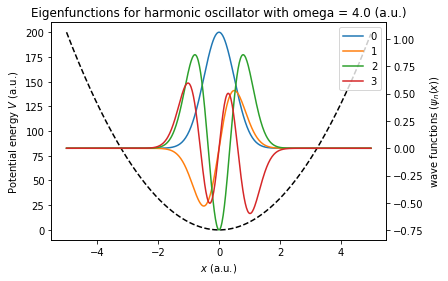



First energies for harmonic oscillator with omega = 8.0
[  4.  12.  20.  28.  36.  44.  52.  60.  68.  76.  84.  92. 100. 108.
 116. 124. 132. 140. 148. 156.]


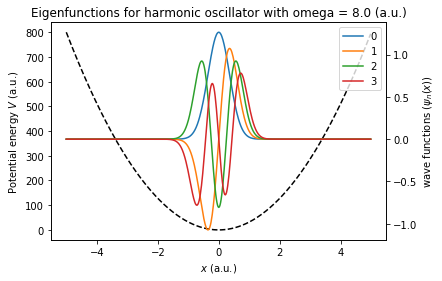

In [8]:
for omega in [4., 8.]:
    # Find energies of a harmonic oscillator V = 0.5*(omega*x)**2
    
    @njit
    def v(x):
        """
        Potential energy
        """
        return 0.5 * (omega * x) ** 2
    
    @njit
    def k(p):
        """
        Non-relativistic kinetic energy
        """
        return 0.5 * p ** 2
    
    harmonic_osc = MUBQHamiltonian(
                        x_grid_dim=512,
                        x_amplitude=5.,
                        v=v,
                        k=k,
                    )
    
    # We will use the double axes plot to simultaneously the potential energy and wave functions.
    # See the tutorial  https://matplotlib.org/examples/api/two_scales.html
    
    fig, ax1 = plt.subplots()
    ax1.plot(
        harmonic_osc.x,
        harmonic_osc.v(harmonic_osc.x),
        '--k',
    )
    ax1.set_ylabel('Potential energy $V$ (a.u.)')
    ax1.set_xlabel('$x$ (a.u.)')
    
    ax2 = ax1.twinx()
    
    # plot eigenfunctions
    for n in range(4):
        ax2.plot(harmonic_osc.x, harmonic_osc.get_eigenstate(n).real, label=str(n))

    print("\n\nFirst energies for harmonic oscillator with omega = {}".format(omega))
    print(harmonic_osc.energies[:20])

    plt.title("Eigenfunctions for harmonic oscillator with omega = {} (a.u.)".format(omega))
    #plt.xlabel('$x$ (a.u.)')
    ax2.set_ylabel('wave functions ($\\psi_n(x)$)')
    plt.legend()
    plt.show()